In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump  # Import joblib for saving models
from google.colab import drive

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/data_male1_female0_high1_low0.csv')  # Update path accordingly

Model and Scaler saved successfully in Google Drive!
Voting Classifier Results
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
ROC AUC Score: 1.00

Confusion Matrix:
[[18632   423]
 [   24 20925]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19055
           1       0.98      1.00      0.99     20949

    accuracy                           0.99     40004
   macro avg       0.99      0.99      0.99     40004
weighted avg       0.99      0.99      0.99     40004



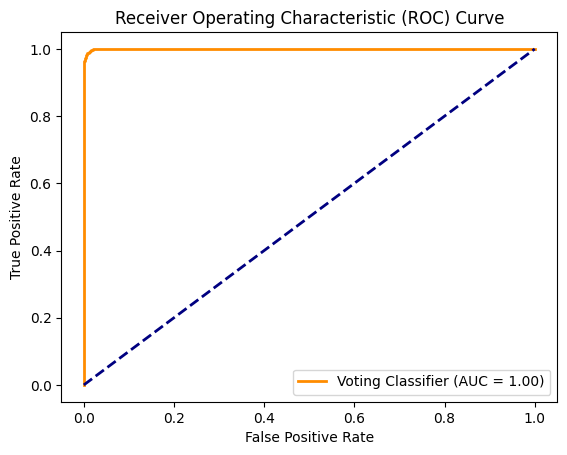

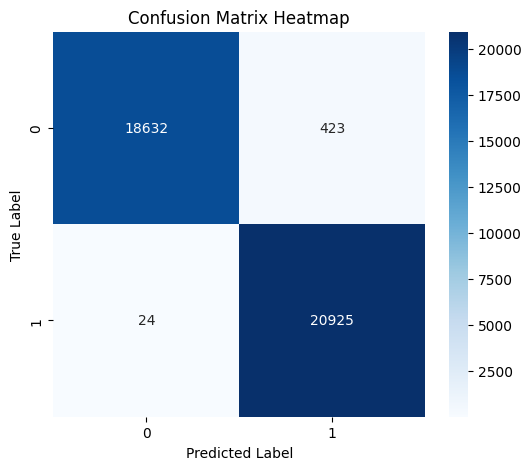

<ipython-input-7-6cf07767597f>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


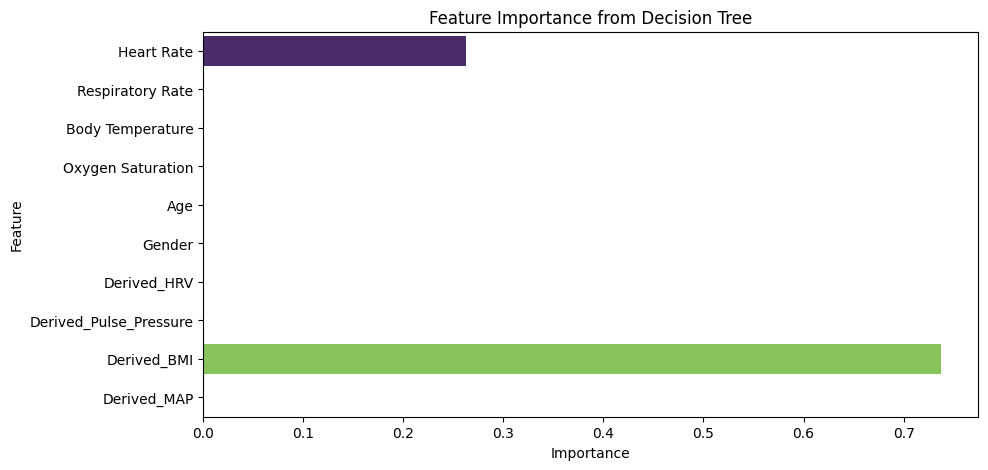

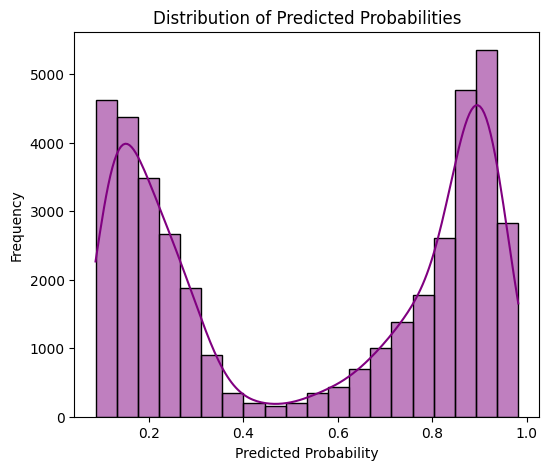

In [ ]:
# Select features and target
X = data[['Heart Rate', 'Respiratory Rate', 'Body Temperature', 'Oxygen Saturation', 'Age', 'Gender',
          'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP']]
y = data['Risk Category']  # Target variable

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (excluding 'Gender' as it's binary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression()
svm_model = SVC(probability=True, kernel='rbf')

# Create a Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[
        ('naive_bayes', nb_model),
        ('decision_tree', dt_model),
        ('logistic_regression', lr_model),
        ('svm', svm_model)
    ],
    voting='soft'  # Probability-based voting
)

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Save the trained model and scaler using joblib
dump(voting_clf, '/content/drive/MyDrive/models/voting_classifier.joblib')
dump(scaler, '/content/drive/MyDrive/models/scaler.joblib')

print("Model and Scaler saved successfully in Google Drive!")

# Train Decision Tree separately for feature importances
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test_scaled)
y_prob = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Voting Classifier Results")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Voting Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Additional Graphs

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Feature Importance (from Decision Tree)
feature_importances = dt_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.show()

# Distribution of Predictions
plt.figure(figsize=(6, 5))
sns.histplot(y_prob, bins=20, kde=True, color='purple')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()
